# CUSTOMER SEGMENTATION PROJECT

This is a project about analyzing the customers of a photography company. We are going to do a cohort analysis in order to group customers into segments to understand high level trends better by providing insights on metrics across product/service and customer lifecycle.

In [1]:
# Explatory Data Analysis

# import pandas 
import pandas as pd

# read training data to a DataFrame df
df = pd.read_csv('customers.csv')

# print df information

print('\n DataFrame Column Names: \n\n', df.columns)
print('\n \n First 5 Rows of the DataFrame:')
df.head()



 DataFrame Column Names: 

 Index(['Cust_ID', 'Inv_No', 'Photo_Type', 'Inv_Date', 'Amount'], dtype='object')

 
 First 5 Rows of the DataFrame:


,Cust_ID,Inv_No,Photo_Type,Inv_Date,Amount
0,16106,43891,SelfTaken.,2013-01-01,29.78
1,10570,43892,NaN,2013-01-01,32.94
2,13796,43893,Official,2013-01-01,29.45
3,10246,43894,School,2013-01-01,23.94
4,5158,43895,Passport,2013-01-01,23.58


In [2]:
print('\n DataFrame Information: \n') 
print(df.info())

print('\n Summary Statistics:'); df.describe()


 DataFrame Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98572 entries, 0 to 98571
Data columns (total 5 columns):
Cust_ID       98572 non-null int64
Inv_No        98572 non-null int64
Photo_Type    91173 non-null object
Inv_Date      98572 non-null object
Amount        98572 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.8+ MB
None

 Summary Statistics:


,Cust_ID,Inv_No,Amount
count,98572.000000,98572.000000,98572.000000
mean,9792.630504,93176.500000,331.195788
std,4158.528998,28455.429704,427.601356
min,2561.000000,43891.000000,10.030000
25%,6207.000000,68533.750000,36.447500
50%,9812.000000,93176.500000,183.105000
75%,13387.000000,117819.250000,396.105000
max,16987.000000,142462.000000,4301.420000


This is the customer dataset of the photography company. There are 5 columns and 98572 rows in the dataset.

1. 'Cust_ID' is a unique integer number for identifying the customers by number. 
2. 'Inv_No' is a unique integer number for each transaction. 
3. 'Photo_Type' is a string type data that describes the types of pictures taken. 
4. 'Inv_Date' indicates the time of the transaction. 
5. 'Amount' is a float number that shows the amount paid by the customer for the transaction.   

Here are some initial observations:
1. Columns don't have any white spaces. 
2. The amount paid for the wedding and engagement photos are higher than the other types of photos. 

Exploring numerical columns:

In [3]:
print('Number of unique Customer IDs:', df['Cust_ID'].nunique())
print('Number of unique Invoice Numbers:', df['Inv_No'].nunique())
print('Number of unique Invoice Dates:', df['Inv_Date'].nunique())

Number of unique Customer IDs: 14414
Number of unique Invoice Numbers: 98572
Number of unique Invoice Dates: 360


Number of unique customers being less than number of rows shows that there are returning customers. 
Invoice numbers equal to number of rows. 
Invoice dates include the three years and three months in the database.

In [4]:
print('Number of missing values: \n', df.isnull().sum())

Number of missing values: 
 Cust_ID          0
Inv_No           0
Photo_Type    7399
Inv_Date         0
Amount           0
dtype: int64


Initial exploratory analysis indicates some problems with the data:

1. The 'Photo_Type' column is missing 7558 rows.
2. The 'Photo_Type' column has some rows ending with a dot.
3. The 'Inv_Date' is of type string that needs to be converted to a DateTime object.

First, since the number of rows having missing values is a small fraction of the dataset, we will drop those rows.

Second, we don't need to worry about the dots because we won't deal with type of photos. 

Third, we will convert the 'Inv_Date' column to DateTime object.

In [5]:
import numpy as np

# first, fill in the empty rows with NaN
df['Photo_Type'].replace('', np.nan, inplace = True)

# then, drop the rows with NaN values
df.dropna(axis=0, how='any', inplace = True)

# convert 'Inv_Date' to DateTime
df['Inv_Date'] =  pd.to_datetime(df['Inv_Date'], format='%Y-%m-%d')

# confirm changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91173 entries, 0 to 98571
Data columns (total 5 columns):
Cust_ID       91173 non-null int64
Inv_No        91173 non-null int64
Photo_Type    91173 non-null object
Inv_Date      91173 non-null datetime64[ns]
Amount        91173 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.2+ MB
None


Here, we are going to build time cohorts. To facilitate, we will extract month values from the data to do calculations. 

In [6]:
import datetime as dt

# function truncating a date object to first day of the month
def get_month (x):
    return dt.datetime(x.year, x.month, 1)

# apply the function to 'Inv_Date' column and save as 'Inv_Month' column
df['Inv_Month'] = df['Inv_Date'].apply(get_month)

# assign the smallest 'Inv_Month' value to each customer
grouping = df.groupby('Cust_ID')['Inv_Month']
df['Cohort_Month'] = grouping.transform('min')

# check the DataFrame head
df.head()


,Cust_ID,Inv_No,Photo_Type,Inv_Date,Amount,Inv_Month,Cohort_Month
0,16106,43891,SelfTaken.,2013-01-01,29.78,2013-01-01,2013-01-01
2,13796,43893,Official,2013-01-01,29.45,2013-01-01,2013-01-01
3,10246,43894,School,2013-01-01,23.94,2013-01-01,2013-01-01
4,5158,43895,Passport,2013-01-01,23.58,2013-01-01,2013-01-01
5,6613,43896,Passport,2013-01-01,22.96,2013-01-01,2013-01-01


Next, we will calculate the number of monthly active customers from each cohort. To do this, we will first define a function to extract year, month and day integer values. Then we will use the function to calculate time offset value. 

In [7]:
# Define a function to extract year, month and day integer values
def get_date_int(df_to_use, column):
    year = df_to_use[column].dt.year
    month = df_to_use[column].dt.month
    day = df_to_use[column].dt.day
    return year, month, day


# Calculate time offset value
invoice_year, invoice_month, _ = get_date_int(df, 'Inv_Month')
cohort_year, cohort_month, _ = get_date_int(df, 'Cohort_Month')

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

df['Cohort_Index'] = years_diff * 12 + months_diff + 1


# Count monthly active customers from each cohort
grouping = df.groupby(['Cohort_Month', 'Cohort_Index'])
cohort_data = grouping['Cust_ID'].apply(pd.Series.nunique)

cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index = 'Cohort_Month',
                                 columns = 'Cohort_Index',
                                 values = 'Cust_ID')

cohort_counts


Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12
Cohort_Month,,,,,,,,,,,,
2013-01-01,6115.0,2397.0,2578.0,2514.0,2633.0,2551.0,2599.0,2544.0,2542.0,2587.0,2519.0,2285.0
2013-02-01,3242.0,1300.0,1323.0,1338.0,1274.0,1337.0,1411.0,1251.0,1358.0,1293.0,1159.0,NaN
2013-03-01,2093.0,880.0,863.0,878.0,880.0,881.0,867.0,867.0,865.0,810.0,NaN,NaN
2013-04-01,1179.0,491.0,476.0,479.0,517.0,479.0,502.0,480.0,453.0,NaN,NaN,NaN
2013-05-01,708.0,294.0,298.0,297.0,294.0,311.0,291.0,257.0,NaN,NaN,NaN,NaN
2013-06-01,415.0,160.0,169.0,161.0,165.0,171.0,137.0,NaN,NaN,NaN,NaN,NaN
2013-07-01,256.0,112.0,109.0,93.0,107.0,101.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-01,179.0,71.0,74.0,61.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-01,111.0,44.0,63.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here, we will use a retention metric that measures how many customers from each of the cohorts have returned in the subsequent months. The first column in the cohort_counts DataFrame is the total number of customers in the cohort. We will use this column to calculate the retention rate, i.e. the fraction of customers coming back later.

In [8]:
# Calculating the retention rate

# store the first column as cohort_sizes
cohort_sizes = cohort_counts.iloc[:, 0]

# divide all values in the cohort_counts table by cohort_sizes
retention = cohort_counts.divide(cohort_sizes, axis = 0)

# review the retention table
retention.round(3)*100


Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12
Cohort_Month,,,,,,,,,,,,
2013-01-01,100.0,39.2,42.2,41.1,43.1,41.7,42.5,41.6,41.6,42.3,41.2,37.4
2013-02-01,100.0,40.1,40.8,41.3,39.3,41.2,43.5,38.6,41.9,39.9,35.7,NaN
2013-03-01,100.0,42.0,41.2,41.9,42.0,42.1,41.4,41.4,41.3,38.7,NaN,NaN
2013-04-01,100.0,41.6,40.4,40.6,43.9,40.6,42.6,40.7,38.4,NaN,NaN,NaN
2013-05-01,100.0,41.5,42.1,41.9,41.5,43.9,41.1,36.3,NaN,NaN,NaN,NaN
2013-06-01,100.0,38.6,40.7,38.8,39.8,41.2,33.0,NaN,NaN,NaN,NaN,NaN
2013-07-01,100.0,43.8,42.6,36.3,41.8,39.5,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-01,100.0,39.7,41.3,34.1,32.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-01,100.0,39.6,56.8,29.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Average Price

In [9]:
# Other metrics

grouping = df.groupby(['Cohort_Month', 'Cohort_Index'])
cohort_data = grouping['Amount'].mean()

cohort_data = cohort_data.reset_index()
average_amount = cohort_data.pivot(index = 'Cohort_Month', 
                                   columns = 'Cohort_Index', 
                                   values = 'Amount')
average_amount.round(1)


Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12
Cohort_Month,,,,,,,,,,,,
2013-01-01,126.1,125.8,128.0,126.0,196.6,200.7,194.6,200.4,674.3,694.7,684.0,683.7
2013-02-01,128.9,136.5,129.5,195.5,199.7,195.1,198.3,682.7,674.4,693.4,709.0,NaN
2013-03-01,126.3,123.4,193.8,201.9,199.4,191.9,673.9,705.1,711.0,682.0,NaN,NaN
2013-04-01,127.0,199.2,195.8,196.9,194.6,703.4,672.4,705.0,688.4,NaN,NaN,NaN
2013-05-01,188.5,198.6,205.3,195.9,682.5,689.6,711.5,709.3,NaN,NaN,NaN,NaN
2013-06-01,194.3,190.4,207.3,661.1,666.1,674.6,712.0,NaN,NaN,NaN,NaN,NaN
2013-07-01,199.8,204.3,548.6,755.8,569.9,677.9,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-01,197.7,668.7,699.1,697.1,589.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-01,633.1,618.1,684.6,719.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Visualizing Cohort Analysis

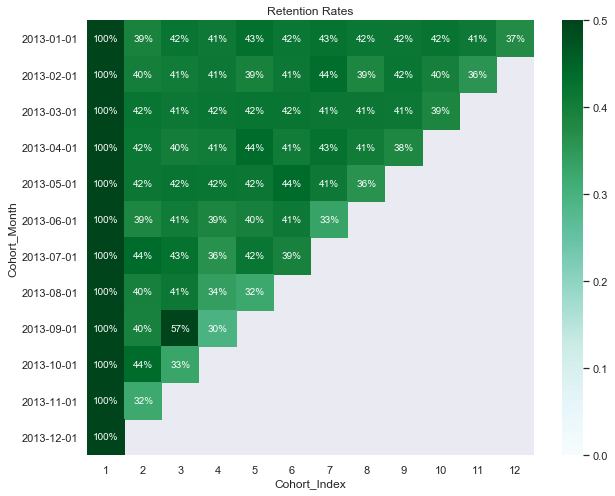

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 8))
plt.title('Retention Rates')
ticks = [item.date() for item in cohort_sizes.index.tolist()] # remove the hours
sns.heatmap(data = retention, 
            yticklabels = ticks,
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0, 
            vmax = 0.5,
            cmap = 'BuGn')
plt.axis('tight')
plt.show()

RFM Analysis

Recency measures how recent the last transaction of each customer is, while frequency measures how many transactions each customer did in the last year. Monetary Value measures the amount each customer spent in the last year.

Let's build the RFM table:

In [11]:
# first check the start and end dates of the 'Inv_Date column
print('Start Date: {}; End Date: {}'.format(min(df.Inv_Date), max(df.Inv_Date)))

Start Date: 2013-01-01 00:00:00; End Date: 2013-12-26 00:00:00


Introduce Snapshot date

In [12]:
snapshot_date = max(df.Inv_Date) + dt.timedelta(days = 1)
print(snapshot_date)

2013-12-27 00:00:00


Calculate RFM metrics

We will build a new DataFrame, RFM_df. For each customer, 
1. we will calculate days passed between today and last purchase (Recency),
2. count invoices for frequency metric (Frequency),
3. sum all the spent amount (Monetary Value).

We can not aggregate and change the column names at the same time, so we will go step by step.


In [13]:
# calculate RFM metrics by aggregating df and saving to agg_df
agg_df = df.groupby(['Cust_ID']).agg({'Inv_Date' : lambda x : (snapshot_date - x.max()).days,
                                     'Inv_No' : 'count',
                                     'Amount' : 'sum'})

# change the column names to RFM
agg_df.rename(columns = {'Inv_Date' : 'Recency',
                        'Inv_No' : 'Frequency',
                        'Amount' : 'Monetary_Value'}, inplace = True)

#change name of agg_df to RFM_table
RFM_table = agg_df

RFM_table.head()

,Recency,Frequency,Monetary_Value
Cust_ID,,,
2561,54,4,3516.27
2562,15,6,1239.98
2563,22,6,1916.68
2564,6,9,4339.82
2565,163,5,967.33


Note that a low recency value is better. It shows that the customer has been to the company recently.

BUILDING RFM SEGMENTS AND RFM SCORE

In [14]:
# building recency quartile
r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(RFM_table['Recency'], 4, labels = r_labels)
RFM_table = RFM_table.assign(R_qrtl = r_quartiles.values)

RFM_table.head()

,Recency,Frequency,Monetary_Value,R_qrtl
Cust_ID,,,,
2561,54,4,3516.27,2
2562,15,6,1239.98,4
2563,22,6,1916.68,3
2564,6,9,4339.82,4
2565,163,5,967.33,1


In [15]:
# building frequency and monetary value quartiles
f_labels = range(1, 5) #should be 1 less than the bin size in qcut argument, note duplicates
mv_labels = range(1, 5)

f_quartiles = pd.qcut(RFM_table['Frequency'], 4, labels = f_labels)#, duplicates='drop') 
mv_quartiles = pd.qcut(RFM_table['Monetary_Value'], 4, labels = mv_labels)

RFM_table = RFM_table.assign(F_qrtl = f_quartiles.values)
RFM_table = RFM_table.assign(M_qrtl = mv_quartiles.values)

RFM_table.head()


,Recency,Frequency,Monetary_Value,R_qrtl,F_qrtl,M_qrtl
Cust_ID,,,,,,
2561,54,4,3516.27,2,1,4
2562,15,6,1239.98,4,2,2
2563,22,6,1916.68,3,2,3
2564,6,9,4339.82,4,4,4
2565,163,5,967.33,1,1,1


Build RFM Segment and RFM Score

In [16]:
def str_rfm(x): 
    return str(x['R_qrtl']) + str(x['F_qrtl']) + str(x['M_qrtl'])

RFM_table['RFM_Segment'] = RFM_table.apply(str_rfm, axis = 1)
RFM_table['RFM_Score'] = RFM_table[['R_qrtl', 'F_qrtl', 'M_qrtl']].sum(axis=1)

RFM_table.head()

,Recency,Frequency,Monetary_Value,R_qrtl,F_qrtl,M_qrtl,RFM_Segment,RFM_Score
Cust_ID,,,,,,,,
2561,54,4,3516.27,2,1,4,214,7.0
2562,15,6,1239.98,4,2,2,422,8.0
2563,22,6,1916.68,3,2,3,323,8.0
2564,6,9,4339.82,4,4,4,444,12.0
2565,163,5,967.33,1,1,1,111,3.0


ANALYZING RFM TABLE

In [17]:
# 10 largest segments
RFM_table.groupby('RFM_Segment').size().sort_values(ascending = False)[:10]

RFM_Segment
111    1674
444     750
344     529
211     514
212     495
434     439
112     381
311     377
334     366
333     360
dtype: int64

Lets examine the segment with the best RFM(444):  

In [18]:
RFM_table[RFM_table['RFM_Segment'] == '444'][:5]

,Recency,Frequency,Monetary_Value,R_qrtl,F_qrtl,M_qrtl,RFM_Segment,RFM_Score
Cust_ID,,,,,,,,
2564,6,9,4339.82,4,4,4,444,12.0
2573,10,10,4247.88,4,4,4,444,12.0
2583,7,10,2967.21,4,4,4,444,12.0
2590,10,11,5579.59,4,4,4,444,12.0
2596,13,10,4565.84,4,4,4,444,12.0


Summary Metrics

In [19]:
RFM_table.groupby('RFM_Score').agg({'Recency' : 'mean',
                                   'Frequency' : 'mean',
                                   'Monetary_Value' : ['mean', 'count']}).round(1)

Recency Frequency Monetary_Value      
             mean      mean           mean count
RFM_Score                                       
3.0         159.4       3.4          531.2  1674
4.0          92.5       4.3          960.5  1098
5.0          68.8       4.7         1242.7  1440
6.0          54.6       5.2         1514.3  1606
7.0          45.4       5.9         1911.4  1764
8.0          38.8       6.7         2246.1  1693
9.0          31.1       7.4         2659.1  1644
10.0         25.6       8.4         3168.8  1512
11.0         16.7       9.2         3703.1  1223
12.0          8.2      10.5         4412.8   750

Gold, Silver and Bronze customers

In [20]:
def invite_members(dtf):
    if dtf['RFM_Score'] >= 9:
        return '1.Gold'
    elif dtf['RFM_Score'] >= 5:
        return '2.Silver'
    else:
        return '3.Bronze'
    
RFM_table['Member_Segment'] = RFM_table.apply(invite_members, axis = 1)
RFM_table.groupby('Member_Segment').agg({'Recency' : 'mean',
                                        'Frequency' : 'mean',
                                        'Monetary_Value' : ['mean', 'count']}).round(1)


Recency Frequency Monetary_Value      
                  mean      mean           mean count
Member_Segment                                       
1.Gold            22.7       8.6         3314.7  5129
2.Silver          51.1       5.7         1752.4  6503
3.Bronze         132.9       3.7          701.2  2772

Data preprocessing for K-means clustering

K-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. 

To be able to do K-means clustering, we need make sure that the variables are symmetrically distributed (i.e. not skewed), and they have the same mean and variance. Let's check our variables:

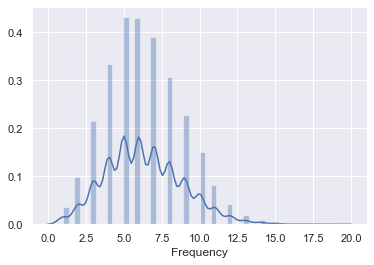

In [21]:
sns.set(style = 'darkgrid')
sns.distplot(RFM_table['Frequency'])
plt.show()

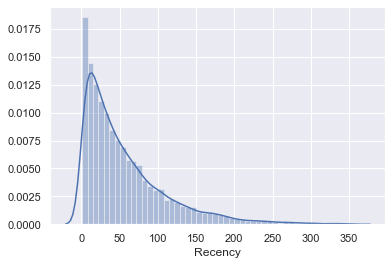

In [22]:
sns.distplot(RFM_table['Recency'])
plt.show()

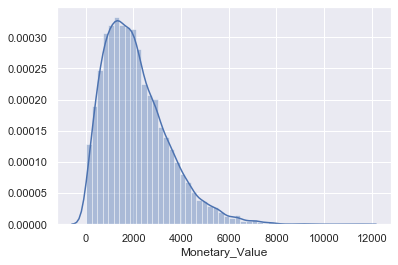

In [23]:
sns.distplot(RFM_table['Monetary_Value'])
plt.show()

In [24]:
RFM_table.describe()

,Recency,Frequency,Monetary_Value,RFM_Score
count,14404.000000,14404.000000,14404.000000,14404.000000
mean,56.740142,6.329700,2106.415113,7.255693
std,54.827491,2.523585,1350.572230,2.677890
min,1.000000,1.000000,20.030000,3.000000
25%,17.000000,5.000000,1099.515000,5.000000
50%,40.000000,6.000000,1871.580000,7.000000
75%,79.000000,8.000000,2860.025000,9.000000
max,356.000000,19.000000,11579.080000,12.000000


The Recency and Monetary Value plots show the variables are not symmetrically distrubuted. In addition, summary statistics show that the variables have different means and variances. To mitigate, first, we will use the log transformation to unskew the data. Second, we will standardize to the same mean and scale to the same standard deviation. 

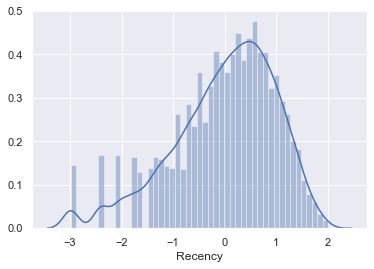

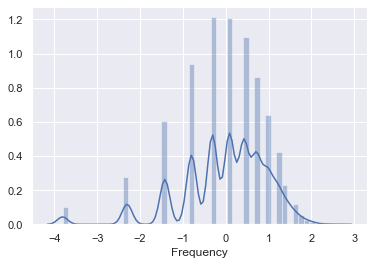

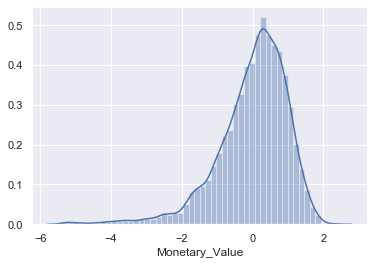

In [25]:
# log transformation in only the RFM variables
RFM_only = RFM_table[['Recency','Frequency','Monetary_Value']]
RFM_log = np.log(RFM_only)

# standardize and scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(RFM_log)
RFM_normalized = scaler.transform(RFM_log)

# RFM_normalized became numpy.ndarray object after this process, build back a df to check
RFM_normalized = pd.DataFrame(data = RFM_normalized, 
                              index = RFM_only.index, 
                              columns = RFM_only.columns)

RFM_normalized.describe()
sns.distplot(RFM_normalized['Recency']) 
plt.show()
sns.distplot(RFM_normalized['Frequency']) 
plt.show()
sns.distplot(RFM_normalized['Monetary_Value']) 
plt.show()

Now that the data is preprocessed, we can start clustering by using the Elbow criterion method to select a good value for k. We will plot the number of clusters (k) against within-cluster-sum-of-squared-errors (SSE), i.e. sum of squared distances from every data point to its cluster center. The elbow point in the plot (where the decrease in SSE slows down) and the next point are good candidates for the best k. 

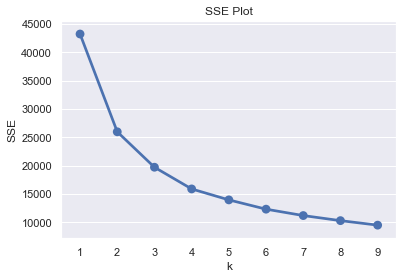

In [26]:
from sklearn.cluster import KMeans

# try k values from 1 to 9 and calculate their SSE
SSE = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 1)
    kmeans.fit(RFM_normalized)
    SSE[k] = kmeans.inertia_

# SSE plot
plt.title('SSE Plot')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x = list(SSE.keys()), y = list(SSE.values()))
plt.show()

The elbow lies at k = 3. We will try both k = 3 and k = 4.

In [27]:
kmeans = KMeans(n_clusters = 3, random_state = 1)
kmeans.fit(RFM_normalized)
cluster_labels = kmeans.labels_

# add new column
RFM_table_k3 = RFM_table.assign(Cluster = cluster_labels)

# calculate RFM for clusters
RFM_table_k3.groupby(['Cluster']).agg({'Recency' : 'mean',
                                      'Frequency' : 'mean',
                                      'Monetary_Value' : ['mean', 'count']}).round(0)



Recency Frequency Monetary_Value      
           mean      mean           mean count
Cluster                                       
0         111.0       3.0          701.0  3132
1          10.0       8.0         2969.0  4033
2          59.0       7.0         2234.0  7239

Looks inline with our RFM analysis. We'll try k=4 and also k=2 for simplicity. 

In [28]:
kmeans = KMeans(n_clusters = 4, random_state = 1)
kmeans.fit(RFM_normalized)
cluster_labels = kmeans.labels_

# add new column
RFM_table_k4 = RFM_table.assign(Cluster = cluster_labels)

# calculate RFM for clusters
RFM_table_k4.groupby(['Cluster']).agg({'Recency' : 'mean',
                                      'Frequency' : 'mean',
                                      'Monetary_Value' : ['mean', 'count']}).round(0)


Recency Frequency Monetary_Value      
           mean      mean           mean count
Cluster                                       
0          45.0       8.0         2960.0  5123
1         143.0       3.0          394.0  1331
2          76.0       5.0         1336.0  4986
3           7.0       7.0         2695.0  2964

The Frequency and Monetary Value of Clusters 0 and 3 seem very close with k=4. 

In [29]:
kmeans = KMeans(n_clusters = 2, random_state = 1)
kmeans.fit(RFM_normalized)
cluster_labels = kmeans.labels_

# add new column
RFM_table_k2 = RFM_table.assign(Cluster = cluster_labels)

# calculate RFM for clusters
RFM_table_k2.groupby(['Cluster']).agg({'Recency' : 'mean',
                                      'Frequency' : 'mean',
                                      'Monetary_Value' : ['mean', 'count']}).round(0)


Recency Frequency Monetary_Value      
           mean      mean           mean count
Cluster                                       
0          34.0       8.0         2719.0  9409
1         100.0       4.0          952.0  4995

Here, the clusters are far more distinct and this clustering is more simple. We will continue with k=3 clusters to balance the simplicity and gaining more insights. This is also inline with the RFM analysis.  

Snake plots

We will use snakeplots to visualize the clustering. To do this, we first need to transform RFM_normalized back to a DataFrame structure which became an numpy ndarray object after scaling. Second, we will add a cluster column and melt the data for easier plotting. 

In [30]:
# transform back to df
RFM_df = pd.DataFrame(RFM_normalized, index = RFM_table.index, columns = RFM_table.columns)

# add 'Cluster' column
RFM_df['Cluster'] = RFM_table_k3['Cluster']

# melt into long format
RFM_melt = pd.melt(RFM_df.reset_index(),
                  id_vars = ['Cust_ID', 'Cluster'],
                  value_vars = ['Recency', 'Frequency', 'Monetary_Value'], # melt these
                  var_name = 'Attribute', # into this
                  value_name = 'Value')

# check the resulting df
RFM_melt.head()

,Cust_ID,Cluster,Attribute,Value
0,2561,2,Recency,0.409494
1,2562,1,Recency,-0.680324
2,2563,2,Recency,-0.354475
3,2564,1,Recency,-1.459904
4,2565,0,Recency,1.349428


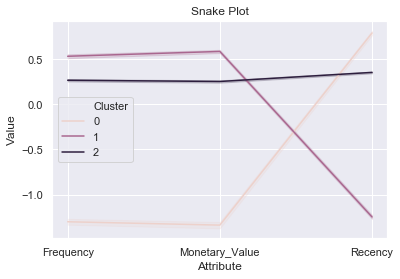

In [31]:
# plot
plt.title('Snake Plot')
sns.lineplot(x = 'Attribute',
            y = 'Value',
            hue = 'Cluster',
            data = RFM_melt)
plt.show()

Finally, we will look at the relative importance of segment attributes as a proportion of cluster average to population average.

In [32]:
RFM_cluster = RFM_table_k3[['Recency', 'Frequency', 'Monetary_Value', 'Cluster']]
RFM_pop = RFM_table[['Recency', 'Frequency', 'Monetary_Value']]

cluster_avg = RFM_cluster.groupby(['Cluster']).mean()
print('Cluster Average:')
cluster_avg


Cluster Average:


,Recency,Frequency,Monetary_Value
Cluster,,,
0,111.458812,3.429119,700.985651
1,10.126209,7.751302,2969.284039
2,59.035364,6.792651,2233.760699


In [33]:
population_avg = RFM_pop.mean()
print('\n Population Average:')
population_avg



 Population Average:


Recency             56.740142
Frequency            6.329700
Monetary_Value    2106.415113
dtype: float64

In [34]:
relative_importance = cluster_avg / population_avg
print('\n Relative Importance:')
relative_importance.round(2)


 Relative Importance:


,Recency,Frequency,Monetary_Value
Cluster,,,
0,1.96,0.54,0.33
1,0.18,1.22,1.41
2,1.04,1.07,1.06


Populating the interactive namespace from numpy and matplotlib


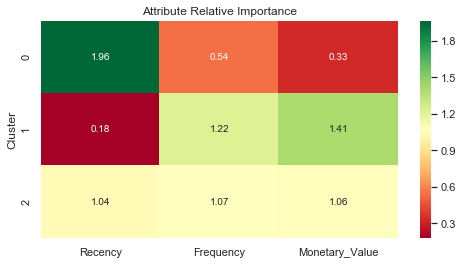

In [64]:
# Plot heatmap for easier interpretation
%pylab inline

plt.figure(figsize(8, 4))
plt.title('Attribute Relative Importance')
sns.heatmap(data = relative_importance, 
            annot = True,
           fmt = '.2f',
           cmap = 'RdYlGn')
plt.axis('tight')
plt.show()